If you run this in Google Colaboraotry, install and import the required libraries. Google Colab notebooks come with many libraries preinstalled, however there are some libraries that need to be installed manually.

For text preprocessing and cleaning, I use the spacy library.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !pip install -q tensorflow_gpu==2.1.0
# !pip install -q ktrain
# !pip3 install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

/bin/sh: 1: pip: not found


In [1]:
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
import re
from bs4 import BeautifulSoup

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Basic data cleaning and data exploration before cleaning.

In [2]:
#clean data
punctuations = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

expansion_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"couldnt" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"doesnt" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"havent" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"shouldnt" : "should not",
"that's" : "that is",
"thats" : "that is",
"there's" : "there is",
"theres" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"theyre":  "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"}

punctuations = punctuations + list(string.punctuation)
stopwords = list(STOP_WORDS)
parser = English()

In [3]:
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [word for word in tokens if word not in stopwords and word not in punctuations]
    tokens = " ".join([i for i in tokens])
    return tokens

def clean_text(x):
    x = str(x).replace("\n","")
    for punct in punctuations:
        x = x.replace(punct, "")
    return x

def clean_numbers(x):
    x = re.sub('\d+', ' ', x)
    return x

def expand(text):
    mispellings_re = re.compile('(%s)' % '|'.join(expansion_dict.keys()))

    def replace(match):
        return expansion_dict[match.group(0)]

    return mispellings_re.sub(replace, text)

def remove_space(string):
    string = BeautifulSoup(string).text.strip().lower()
    string = re.sub(r'((http)\S+)', 'http', string)
    string = re.sub(r'\s+', ' ', string)
    return string

def removeurl(raw_text):
    clean_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', raw_text, flags=re.MULTILINE)
    return clean_text

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
#removing url tags
train['text'] = train['text'].apply(lambda x:removeurl(x))
test['text'] = test['text'].apply(lambda x:removeurl(x))

train['text'] = train['text'].apply(lambda x:clean_text(x))
test['text'] = test['text'].apply(lambda x:clean_text(x))

train['text'] = train['text'].apply(lambda x:clean_numbers(x))
test['text'] = test['text'].apply(lambda x:clean_numbers(x))

train['text'] = train['text'].apply(lambda x:expand(x))
test['text'] = test['text'].apply(lambda x:expand(x))

train['text'] = train['text'].apply(lambda x:remove_space(x))
test['text'] = test['text'].apply(lambda x:remove_space(x))

# data cleaning - The best result is obtained without applying spacy_tokenizer
# train['text'] = train['text'].apply(lambda x:spacy_tokenizer(x))
# test['text'] = test['text'].apply(lambda x:spacy_tokenizer(x))

In [6]:
def calculate_nr_words(text):
    return len(text.split(" "))
    
print(max(train['text'].apply(calculate_nr_words)))
print(max(test['text'].apply(calculate_nr_words)))

31
31


# Model training - Using Hugging Face transformers 


In [7]:
X_train,X_val,Y_train,Y_val = train_test_split(train["text"],train["target"],test_size=0.2,random_state=10)

In [8]:
MODEL_NAME = 'albert-base-v2'
t = text.Transformer(MODEL_NAME, maxlen=54, class_names=list(Y_train.unique()))
trn = t.preprocess_train(X_train.tolist(), Y_train.values)
val = t.preprocess_test(X_val.tolist(), Y_val.values)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=64)

preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 24
	99percentile : 27


I0827 18:41:47.131813 139758245728384 filelock.py:274] Lock 139754762961976 acquired on /root/.cache/torch/transformers/dd1588b85b6fdce1320e224d29ad062e97588e17326b9d05a0b29ee84b8f5f93.c81d4deb77aec08ce575b7a39a989a79dd54f321bfb82c2b54dd35f52f8182cf.lock


I0827 18:41:50.077205 139758245728384 filelock.py:318] Lock 139754762961976 released on /root/.cache/torch/transformers/dd1588b85b6fdce1320e224d29ad062e97588e17326b9d05a0b29ee84b8f5f93.c81d4deb77aec08ce575b7a39a989a79dd54f321bfb82c2b54dd35f52f8182cf.lock


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 15
	95percentile : 24
	99percentile : 27


I0827 18:41:52.688567 139758245728384 filelock.py:274] Lock 139754763005680 acquired on /root/.cache/torch/transformers/0bbb1531ce82f042a813219ffeed7a1fa1f44cd8f78a652c47fc5311e0d40231.978ff53dd976bbf4bc66f09bf4205da0542be753d025263787842df74d15bbca.lock


I0827 18:41:53.422364 139758245728384 filelock.py:318] Lock 139754763005680 released on /root/.cache/torch/transformers/0bbb1531ce82f042a813219ffeed7a1fa1f44cd8f78a652c47fc5311e0d40231.978ff53dd976bbf4bc66f09bf4205da0542be753d025263787842df74d15bbca.lock


I0827 18:41:53.641170 139758245728384 filelock.py:274] Lock 139754762950472 acquired on /root/.cache/torch/transformers/50428ceaeb0584246e36e8358acf0a7e64d59c81c28b76e5969c322c6a1c7109.157325bc38321adb8060997296aa9451745f43dd6598e83275ad2cf988575f39.h5.lock


I0827 18:42:06.118051 139758245728384 filelock.py:318] Lock 139754762950472 released on /root/.cache/torch/transformers/50428ceaeb0584246e36e8358acf0a7e64d59c81c28b76e5969c322c6a1c7109.157325bc38321adb8060997296aa9451745f43dd6598e83275ad2cf988575f39.h5.lock


In [9]:
learner.lr_find(show_plot=True)  

simulating training for different learning rates... this may take a few moments...


In [13]:
learner.fit_onecycle(5e-5, 1)  
#learner.fit(5e-5, 3, cycle_len=2)
#learner.autofit(0.0001)



begin training using onecycle policy with max lr of 5e-05...
Train for 96 steps, validate for 48 steps
96/96 [==============================] - 894s 9s/step - loss: 0.4886 - accuracy: 0.7755 - val_loss: 0.4032 - val_accuracy: 0.8253


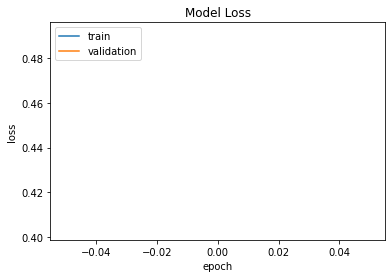

In [14]:
learner.plot()

In [15]:
learner.validate(class_names=t.get_classes())  

              precision    recall  f1-score   support

           0       0.80      0.91      0.86       861
           1       0.86      0.71      0.78       662

    accuracy                           0.83      1523
   macro avg       0.83      0.81      0.82      1523
weighted avg       0.83      0.83      0.82      1523



array([[787,  74],
       [192, 470]])

In [16]:
learner.view_top_losses(n=5)

----------
id:244 | loss:3.61 | true:0 | pred:1)

----------
id:1439 | loss:3.15 | true:0 | pred:1)

----------
id:830 | loss:3.06 | true:0 | pred:1)

----------
id:1155 | loss:3.02 | true:0 | pred:1)

----------
id:1182 | loss:2.91 | true:0 | pred:1)



In [17]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictions = predictor.predict(test['text'].tolist())

In [18]:
print(X_val.iloc[1368])
predictor.explain(X_val.iloc[1368]) 

leicestermerc icymi ashes australia collapse at trent bridge how twitter reaû http http y fcljed


This code is used to create a submission file for the Kaggle competition.

In [ ]:
submission_df = pd.concat([test["id"],pd.Series(predictions, name="target")], axis=1)
submission_df.head()
submission_df.to_csv("submission.csv", index=False)